### **Check Point 1 !**

> ###  Data Exploration and Understanding

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', None)        
pd.set_option('display.max_colwidth', None) 


In [89]:
# Load dataset
df = pd.read_csv('loan_data.csv')
df.head()

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vacation with my family.,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installing solar panels.,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a kitchen remodel.",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and appliances for my house.,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved


In [90]:
df.describe()

,Income,Credit_Score,Loan_Amount,DTI_Ratio
count,24000.000000,24000.000000,24000.000000,24000.000000
mean,110377.552708,575.720333,44356.154833,34.719167
std,51729.677627,159.227621,34666.604785,32.322471
min,20001.000000,300.000000,1005.000000,2.530000
25%,65635.750000,437.000000,16212.000000,14.507500
50%,110464.000000,575.000000,35207.000000,24.860000
75%,155187.000000,715.000000,65622.750000,41.840000
max,200000.000000,850.000000,158834.000000,246.330000


> ### Dataset Explanation
---
### 🔍 Dataset Overview
The dataset consists of 24,000 entries and 7 columns:
- `Text` (string): User-provided reason for requesting a loan.
- `Income` (numeric): Applicant's income.
- `Credit_Score` (numeric): Applicant’s credit score.
- `Loan_Amount` (numeric): Amount of loan requested.
- `DTI_Ratio` (numeric): Debt-to-Income ratio.
- `Employment_Status` (categorical): Employment status (`employed` / `unemployed`).
- `Approval` (categorical): Target variable – whether the loan was `Approved` or `Rejected`.
---

> ### Goals!
- ### Primary Goal
The primary goal of this project is to build a machine learning model that can predict whether a loan application will be accepted or rejected based on available information such as income, credit score, loan amount, and employment status.

- ### Secondary Goals
- Analyze the factors that most influence loan approval decisions.
- Provide business insights to support automated loan screening process.
- Build a simple dashboard using Streamlit for interactive inputs and predictions.

---

> ### Data Cleaning

- Check Missing Value

In [91]:
df.isnull().sum()

Text                 0
Income               0
Credit_Score         0
Loan_Amount          0
DTI_Ratio            0
Employment_Status    0
Approval             0
dtype: int64

`There are no missing value here!`

- Check duplicated data

In [92]:
len(df.drop_duplicates()) / len(df)

1.0

`There are no duplicated data!`

- Check Data Type

In [93]:
df.head()

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval
0,I need a loan to pay for an international vacation with my family.,26556,581,8314,79.26,employed,Rejected
1,I want to make home improvements like installing solar panels.,197392,389,111604,22.14,employed,Rejected
2,"I need a loan for home renovation, including a kitchen remodel.",44561,523,34118,45.44,employed,Rejected
3,I need funds to buy new furniture and appliances for my house.,190363,729,118757,10.22,unemployed,Rejected
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Text               24000 non-null  object 
 1   Income             24000 non-null  int64  
 2   Credit_Score       24000 non-null  int64  
 3   Loan_Amount        24000 non-null  int64  
 4   DTI_Ratio          24000 non-null  float64
 5   Employment_Status  24000 non-null  object 
 6   Approval           24000 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.3+ MB


> ### Feature Engineering and Data Transformation:

In [95]:
df['Loan_to_Income'] = df['Loan_Amount'] / df['Income']

In [96]:
df['Risk_Score'] = df['Credit_Score'] + df['DTI_Ratio']

In [97]:
df.head()

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval,Loan_to_Income,Risk_Score
0,I need a loan to pay for an international vacation with my family.,26556,581,8314,79.26,employed,Rejected,0.313074,660.26
1,I want to make home improvements like installing solar panels.,197392,389,111604,22.14,employed,Rejected,0.565393,411.14
2,"I need a loan for home renovation, including a kitchen remodel.",44561,523,34118,45.44,employed,Rejected,0.765647,568.44
3,I need funds to buy new furniture and appliances for my house.,190363,729,118757,10.22,unemployed,Rejected,0.623845,739.22
4,I need a loan to start a small business.,61853,732,19210,44.13,employed,Approved,0.310575,776.13


In [98]:
from sklearn.preprocessing import StandardScaler

# 1. Feature Engineering: Classifying DTI Ratio
bins = [0, 20, 40, 100]  # Adjust these thresholds as per the dataset distribution
labels = ['Low', 'Medium', 'High']
df['DTI_Category'] = pd.cut(df['DTI_Ratio'], bins=bins, labels=labels, right=False)

# 2. Employment Status Encoding
df['Employment_Status'] = df['Employment_Status'].apply(lambda x: 1 if x == 'employed' else 0)

# 3. Standardizing numerical columns
numerical_columns = ['Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio', 'Loan_to_Income', 'Risk_Score']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the updated dataframe
df.head()


,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval,Loan_to_Income,Risk_Score,DTI_Category
0,I need a loan to pay for an international vacation with my family.,-1.620410,0.033159,-1.039701,1.378043,1,Rejected,-0.400221,0.306807,High
1,I want to make home improvements like installing solar panels.,1.682134,-1.172687,1.939886,-0.389185,1,Rejected,0.706185,-1.227336,Medium
2,"I need a loan for home renovation, including a kitchen remodel.",-1.272344,-0.331107,-0.295338,0.331690,1,Rejected,1.584292,-0.258643,High
3,I need funds to buy new furniture and appliances for my house.,1.546252,0.962665,2.146227,-0.757977,0,Rejected,0.962496,0.793062,Low
4,I need a loan to start a small business.,-0.938060,0.981506,-0.725386,0.291161,1,Approved,-0.411180,1.020363,High


### Why using `bins = [0, 20, 40, 100]`
### `Low DTI Ratio (0-20)`:
A DTI ratio below 20% is typically considered very manageable by lenders, meaning the person’s debt obligations are relatively low compared to their income. This is why it's categorized as "Low."

### `Medium DTI Ratio (20-40)`:
A DTI ratio between 20% and 40% suggests a moderate level of debt relative to income. This range often represents borrowers who may be able to manage their debt but might face some challenges if other expenses arise.

### `High DTI Ratio (40-100)`:
A DTI ratio above 40% generally indicates that the borrower has a high amount of debt relative to their income. Many lenders may see this as a risk factor since the borrower is more likely to struggle with paying off debt, hence it is categorized as "High."

### `Why these bins?`
These thresholds (0, 20, 40, 100) are based on general financial practices and credit industry norms. Lenders often consider a DTI ratio of:

- **Below 20%**: Ideal (good financial health),
- **20%-40%**: Acceptable, but could be risky,
- **Above 40%**: Considered risky for loan approval.

> ### Encode for Approval only

In [99]:
# Encode Approval binary (0/1)
df['Approval'] = df['Approval'].map({'Approved': 1, 'Rejected': 0})

> ### Clean text

In [100]:
import re

def clean_text(text):
    # Remove special characters and extra spaces
    return re.sub(r'[^a-zA-Z0-9\s]', '', text).strip().lower()

df['Text_Clean'] = df['Text'].apply(clean_text)

> ### Exploratory Data Analysis (EDA):

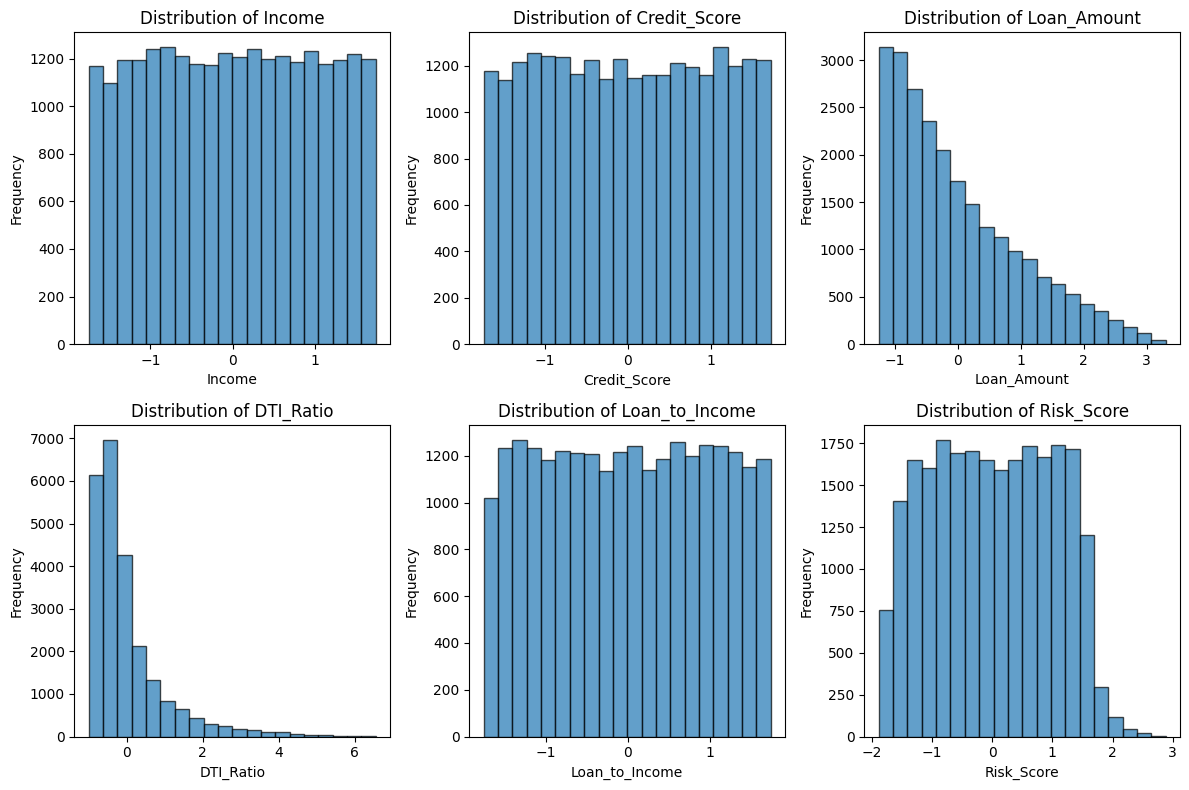

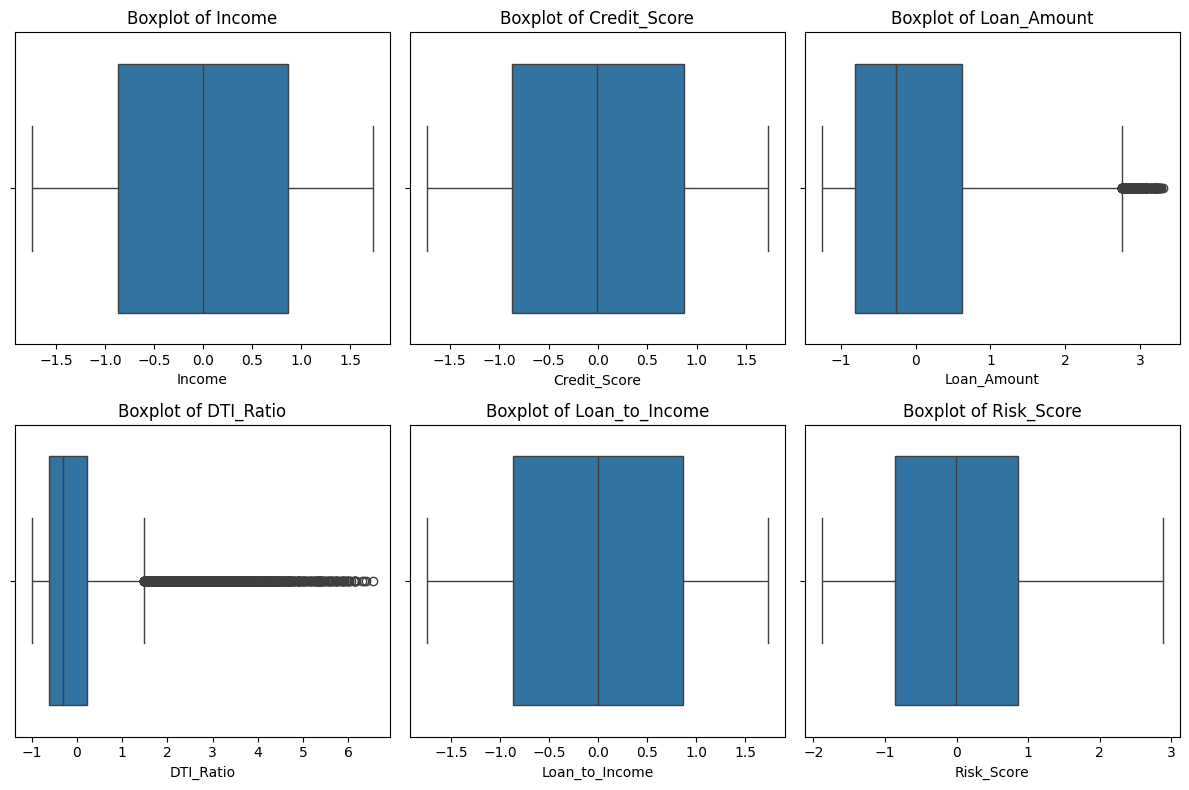

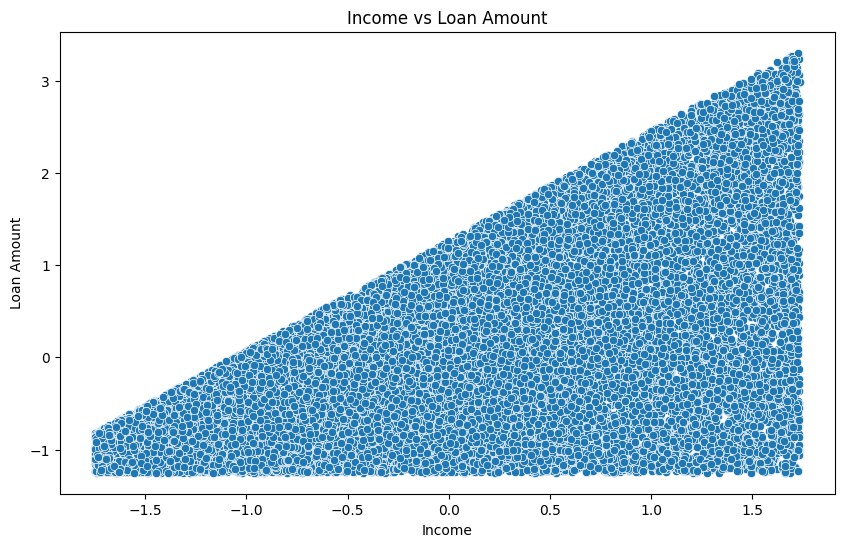

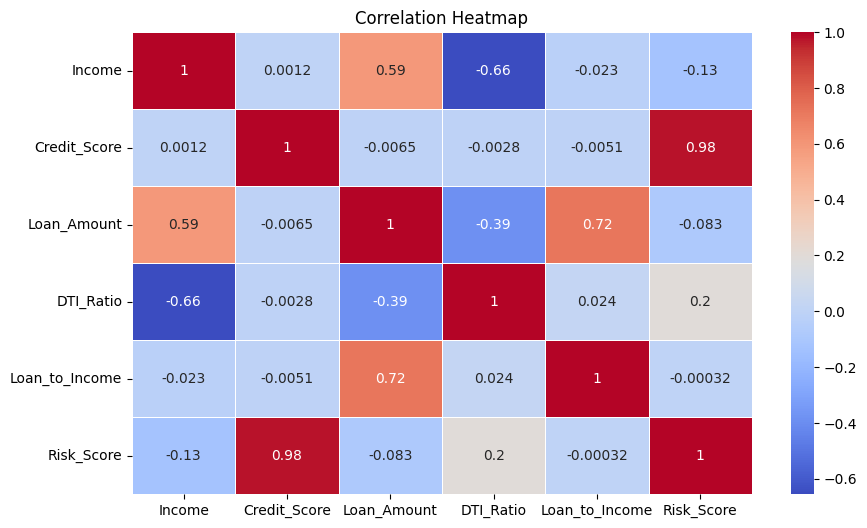

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualize distributions of numerical columns
numerical_columns = ['Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio', 'Loan_to_Income', 'Risk_Score']

# Histograms
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[column], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Boxplots to detect outliers
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

# 3. Scatter plots for key feature relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Loan_Amount', data=df)
plt.title('Income vs Loan Amount')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

# 4. Correlation Heatmap
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


> ### Conclusion from visualization above!:
### Data Cleaning:
- Handle outliers, especially in the **Loan Amount** and **DTI Ratio**. Consider capping or removing extreme values to reduce their impact on the analysis.

### Feature Engineering:
- Consider creating additional features such as **Income to Loan Amount Ratio**.
- Explore using existing features to predict **Risk Score** and **Loan Approval**.

### Modeling:
- Use models like **Logistic Regression**, **Decision Trees**, or **Random Forests**.
- These models will benefit from understanding the relationships highlighted by our **Exploratory Data Analysis (EDA)**.


----------

### **START TO MACHINE LEARNING**

> ### Split the Dataset

In [102]:
df.head()

,Text,Income,Credit_Score,Loan_Amount,DTI_Ratio,Employment_Status,Approval,Loan_to_Income,Risk_Score,DTI_Category,Text_Clean
0,I need a loan to pay for an international vacation with my family.,-1.620410,0.033159,-1.039701,1.378043,1,0,-0.400221,0.306807,High,i need a loan to pay for an international vacation with my family
1,I want to make home improvements like installing solar panels.,1.682134,-1.172687,1.939886,-0.389185,1,0,0.706185,-1.227336,Medium,i want to make home improvements like installing solar panels
2,"I need a loan for home renovation, including a kitchen remodel.",-1.272344,-0.331107,-0.295338,0.331690,1,0,1.584292,-0.258643,High,i need a loan for home renovation including a kitchen remodel
3,I need funds to buy new furniture and appliances for my house.,1.546252,0.962665,2.146227,-0.757977,0,0,0.962496,0.793062,Low,i need funds to buy new furniture and appliances for my house
4,I need a loan to start a small business.,-0.938060,0.981506,-0.725386,0.291161,1,1,-0.411180,1.020363,High,i need a loan to start a small business


In [103]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df[['Income', 'Credit_Score', 'Loan_Amount', 'DTI_Ratio', 'Loan_to_Income', 'Risk_Score', 'DTI_Category', 'Employment_Status']]
y = df['Approval']  

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and test sets to confirm the split
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (19200, 8)
Test data shape: (4800, 8)


- The reason why i split dataset into train and test only, not valuation because the dataset is not really big

> ### Check Missing Value

In [104]:
# Check for missing values in your dataset
print(X.isnull().sum())  # For features

Income                  0
Credit_Score            0
Loan_Amount             0
DTI_Ratio               0
Loan_to_Income          0
Risk_Score              0
DTI_Category         1255
Employment_Status       0
dtype: int64


- Let's handle it!

In [105]:
X.isnull()

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Loan_to_Income,Risk_Score,DTI_Category,Employment_Status
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
23995,False,False,False,False,False,False,False,False
23996,False,False,False,False,False,False,False,False
23997,False,False,False,False,False,False,False,False
23998,False,False,False,False,False,False,False,False


In [106]:
missing_count = X['DTI_Category'].isna().sum()

# Total b
total_count = len(X)
percentage_missing = 100 * missing_count / total_count

print(f"missing value on DTI_Category: {percentage_missing:.2f}%")

missing value on DTI_Category: 5.23%


- because it less than 20%, we handle it!

In [107]:
from sklearn.impute import SimpleImputer

# Separate categorical and numerical columns
categorical_columns = ['DTI_Category'] 
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Impute missing values for categorical columns using 'most_frequent' (mode)
imputer_cat = SimpleImputer(strategy='most_frequent')
X[categorical_columns] = imputer_cat.fit_transform(X[categorical_columns])


C:\Temp\ipykernel_19236\1047272996.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[categorical_columns] = imputer_cat.fit_transform(X[categorical_columns])


In [108]:
X.isnull().sum()

Income               0
Credit_Score         0
Loan_Amount          0
DTI_Ratio            0
Loan_to_Income       0
Risk_Score           0
DTI_Category         0
Employment_Status    0
dtype: int64

> ### Handle the outliers

In [109]:
import scipy.stats as stats

def check_plot(x_train, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))


    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=x_train[variable])
    plt.title('Boxplot')

    plt.show()

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Text               24000 non-null  object  
 1   Income             24000 non-null  float64 
 2   Credit_Score       24000 non-null  float64 
 3   Loan_Amount        24000 non-null  float64 
 4   DTI_Ratio          24000 non-null  float64 
 5   Employment_Status  24000 non-null  int64   
 6   Approval           24000 non-null  int64   
 7   Loan_to_Income     24000 non-null  float64 
 8   Risk_Score         24000 non-null  float64 
 9   DTI_Category       22745 non-null  category
 10  Text_Clean         24000 non-null  object  
dtypes: category(1), float64(6), int64(2), object(2)
memory usage: 1.9+ MB


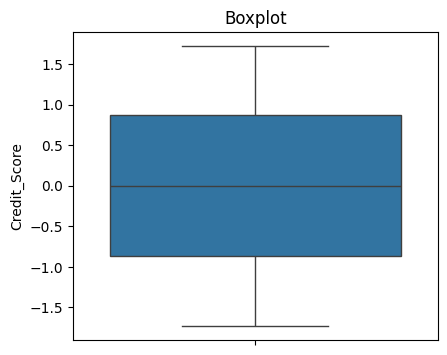

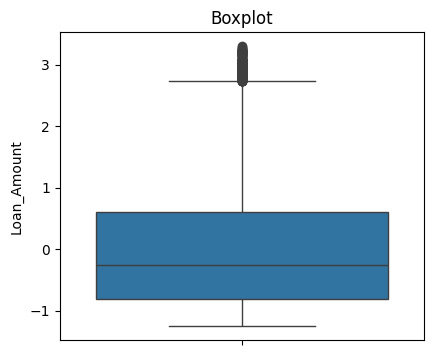

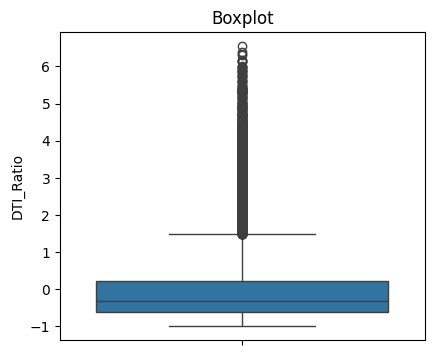

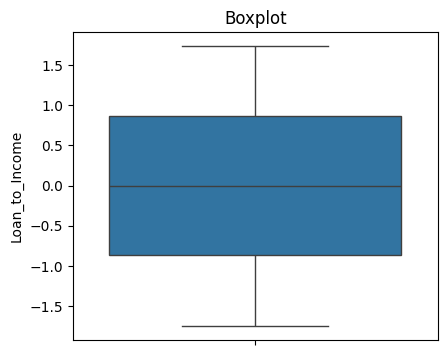

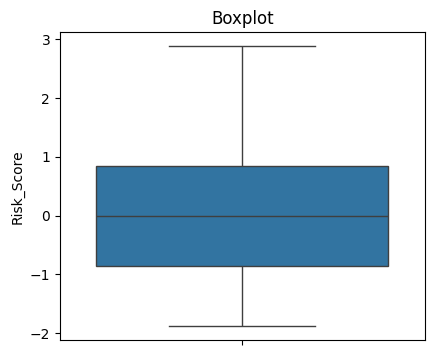

In [111]:
numeric_columns = X_train.select_dtypes(include=['number']).columns
for col in numeric_columns:
    if col in ['Income ','Credit_Score', 'Loan_Amount', 'DTI_Ratio','Approval', 'Loan_to_Income', 'Risk_Score']:
        check_plot(X_train, col)

- There is outliers on loan_amount and DTI_ratio

In [112]:
import numpy as np

# Handle outliers for Loan Amount using IQR (Interquartile Range)
Q1_loan = X_train['Loan_Amount'].quantile(0.25)
Q3_loan = X_train['Loan_Amount'].quantile(0.75)
IQR_loan = Q3_loan - Q1_loan
lower_bound_loan = Q1_loan - 1.5 * IQR_loan
upper_bound_loan = Q3_loan + 1.5 * IQR_loan

# Cap outliers in the Loan Amount feature
X_train['Loan_Amount'] = np.where(X_train['Loan_Amount'] < lower_bound_loan, lower_bound_loan,
                                   np.where(X_train['Loan_Amount'] > upper_bound_loan, upper_bound_loan, X_train['Loan_Amount']))

# Repeat the same for the test set
X_test['Loan_Amount'] = np.where(X_test['Loan_Amount'] < lower_bound_loan, lower_bound_loan,
                                  np.where(X_test['Loan_Amount'] > upper_bound_loan, upper_bound_loan, X_test['Loan_Amount']))

# Handle outliers for DTI Ratio using IQR (Interquartile Range)
Q1_dti = X_train['DTI_Ratio'].quantile(0.25)
Q3_dti = X_train['DTI_Ratio'].quantile(0.75)
IQR_dti = Q3_dti - Q1_dti
lower_bound_dti = Q1_dti - 1.5 * IQR_dti
upper_bound_dti = Q3_dti + 1.5 * IQR_dti

# Cap outliers in the DTI Ratio feature
X_train['DTI_Ratio'] = np.where(X_train['DTI_Ratio'] < lower_bound_dti, lower_bound_dti,
                                 np.where(X_train['DTI_Ratio'] > upper_bound_dti, upper_bound_dti, X_train['DTI_Ratio']))

# Repeat the same for the test set
X_test['DTI_Ratio'] = np.where(X_test['DTI_Ratio'] < lower_bound_dti, lower_bound_dti,
                                np.where(X_test['DTI_Ratio'] > upper_bound_dti, upper_bound_dti, X_test['DTI_Ratio']))

# Check the values after capping outliers for Loan Amount and DTI Ratio
print(f"Loan Amount column in training set: Min = {X_train['Loan_Amount'].min()}, Max = {X_train['Loan_Amount'].max()}")
print(f"Loan Amount column in test set: Min = {X_test['Loan_Amount'].min()}, Max = {X_test['Loan_Amount'].max()}")
print(f"DTI Ratio column in training set: Min = {X_train['DTI_Ratio'].min()}, Max = {X_train['DTI_Ratio'].max()}")
print(f"DTI Ratio column in test set: Min = {X_test['DTI_Ratio'].min()}, Max = {X_test['DTI_Ratio'].max()}")


Loan Amount column in training set: Min = -1.250542367195403, Max = 2.735260526301764
Loan Amount column in test set: Min = -1.2503981331638065, Max = 2.735260526301764
DTI Ratio column in training set: Min = -0.99589657007064, Max = 1.4832740089905605
DTI Ratio column in test set: Min = -0.9931120714871848, Max = 1.4832740089905605


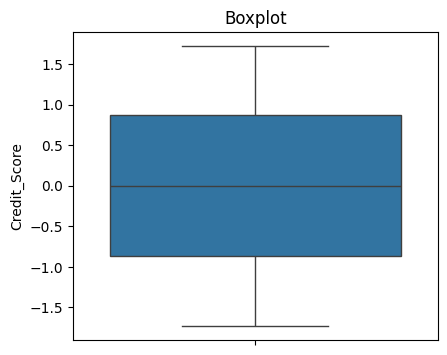

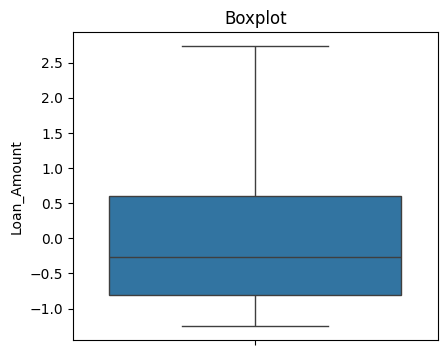

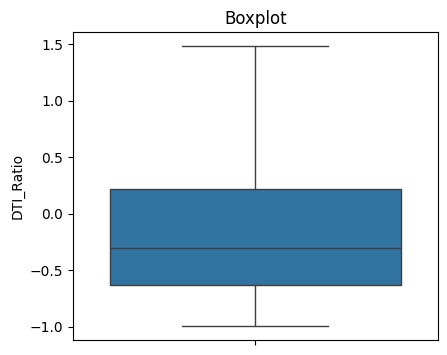

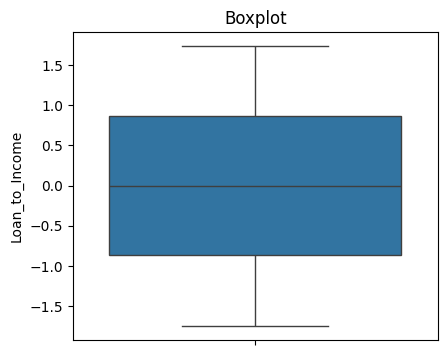

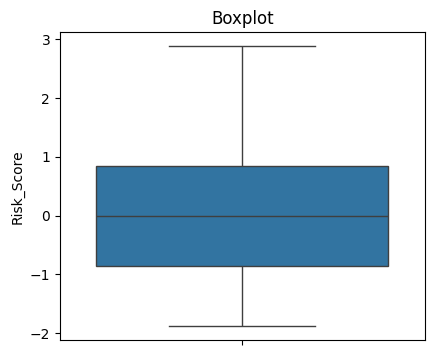

In [113]:
numeric_columns = X_train.select_dtypes(include=['number']).columns
for col in numeric_columns:
    if col in ['Income ','Credit_Score', 'Loan_Amount', 'DTI_Ratio','Approval', 'Loan_to_Income', 'Risk_Score']:
        check_plot(X_train, col)

- The dataset are safe from outliers

> ### Encoding Categorical Variables

- After handling outliers, we need to encode the categorical variables:
    - Approval (target variable)
    - DTI_Category (feature)
    - Employment_Status (feature)

The reason why we using LabelEncoder because it is the best choice for binary and ordinal categorical variables in your dataset, as it preserves the relationship between categories and is computationally efficient.

We will use LabelEncoder for encoding:

In [114]:
from sklearn.preprocessing import LabelEncoder

# Encode 'Approval' (0: Rejected, 1: Approved)
le_approval = LabelEncoder()
y_train = le_approval.fit_transform(y_train)
y_test = le_approval.transform(y_test)  # Apply to test set

# Encode 'DTI_Category' (High, Medium, Low -> 0, 1, 2)
le_dti_category = LabelEncoder()
X_train['DTI_Category'] = le_dti_category.fit_transform(X_train['DTI_Category'])
X_test['DTI_Category'] = le_dti_category.transform(X_test['DTI_Category'])  # Apply to test set

# Encode 'Employment_Status' (1: Employed, 0: Unemployed)
X_train['Employment_Status'] = X_train['Employment_Status'].apply(lambda x: 1 if x == 1 else 0)
X_test['Employment_Status'] = X_test['Employment_Status'].apply(lambda x: 1 if x == 1 else 0)

# Check the first few rows of the training data after encoding
print(X_train.head())

         Income  Credit_Score  Loan_Amount  DTI_Ratio  Loan_to_Income  \
3572  -0.297564     -1.323418    -0.254433   0.082942       -0.132528   
16782  1.391850     -1.298296     1.506722  -0.355771        0.549276   
20543 -0.519801      1.615832    -0.078872  -0.693933        0.413007   
12368  1.221113      1.201322     1.968963  -0.543261        1.072343   
19955 -1.341261     -0.607447    -0.936083   1.469313       -0.499565   

       Risk_Score  DTI_Category  Employment_Status  
3572    -1.281159             2                  1  
16782   -1.343850             2                  0  
20543    1.446268             1                  0  
12368    1.069814             1                  0  
19955   -0.303167             0                  1  


> ### Model Training and Evaluation

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Define models to try
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42)
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))



Training Logistic Regression...
Logistic Regression Accuracy: 0.9329166666666666
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4047
           1       0.79      0.77      0.78       753

    accuracy                           0.93      4800
   macro avg       0.88      0.87      0.87      4800
weighted avg       0.93      0.93      0.93      4800


Training Decision Tree...
Decision Tree Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4047
           1       1.00      1.00      1.00       753

    accuracy                           1.00      4800
   macro avg       1.00      1.00      1.00      4800
weighted avg       1.00      1.00      1.00      4800


Training Random Forest...
Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4047
           1       1.00      1.00      1.00  

### Analysis of Results:

#### **Overfitting with Decision Tree and Random Forest:**
- Both **Decision Tree** and **Random Forest** show **100% accuracy** on the training data, which suggests **overfitting**. These models may have memorized the training data and do not generalize well to unseen data.
- In real-world applications, models that achieve **100% accuracy** on the training set but perform poorly on the test set are usually **overfitting**. We may need to **tune the hyperparameters** (e.g., `max_depth`, `min_samples_split`, `min_samples_leaf` for Decision Trees and Random Forest) to avoid this issue.

#### **KNN and SVM:**
- **KNN** and **SVM** have performed well with an **accuracy of around 99%** and balanced **precision** and **recall** for both classes. They appear to be **generalizing well** without overfitting.
- Both models seem to be solid candidates for further exploration and fine-tuning.

#### **Logistic Regression:**
- **Logistic Regression** has slightly lower accuracy (**93.29%**) and slightly lower **recall/precision** for the **Approved (class 1)** label, indicating it might struggle with predicting the **minority class (Approved)**.
- If the data is **imbalanced** (which it seems to be, given fewer approved loans), **Logistic Regression** might benefit from using techniques like **class weights** or **sampling methods** (e.g., **SMOTE**).


> ### Hyperparameter Tuning

In [116]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grids for each model

# 1. Logistic Regression
param_grid_lr = {
    'C': [0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2']  # Regularization type
}

# 2. Decision Tree
param_grid_dt = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 3. Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 4. K-Nearest Neighbors (KNN)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree']
}

# 5. Support Vector Machine (SVM)
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(random_state=42)
}

param_grids = {
    "Logistic Regression": param_grid_lr,
    "Decision Tree": param_grid_dt,
    "Random Forest": param_grid_rf,
    "K-Nearest Neighbors": param_grid_knn,
    "Support Vector Machine": param_grid_svm
}

# Perform GridSearchCV for each model
for name, model in models.items():
    print(f"\nTuning hyperparameters for {name}...")
    
    # Get the corresponding parameter grid for the model
    param_grid = param_grids[name]
    
    # Initialize GridSearchCV with cross-validation (cv=5)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
    
    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best model
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    best_model = grid_search.best_estimator_
    
    # Evaluate the best model on the test set
    y_pred_best = best_model.predict(X_test)
    print(f"Best {name} Model Accuracy: {accuracy_score(y_test, y_pred_best)}")
    print(classification_report(y_test, y_pred_best))



Tuning hyperparameters for Logistic Regression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\PC\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear

Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l2'}
Best Logistic Regression Model Accuracy: 0.9329166666666666
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      4047
           1       0.79      0.77      0.78       753

    accuracy                           0.93      4800
   macro avg       0.88      0.87      0.87      4800
weighted avg       0.93      0.93      0.93      4800


Tuning hyperparameters for Decision Tree...
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Decision Tree Model Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4047
           1       1.00      1.00      1.00       753

    accuracy                           1.00      4800
   macro avg       1.00      1.00      1.00      4800
weighted avg       1.00     

> ### **Results:**
- Based on the results, **K-Nearest Neighbors (KNN)** and **Support Vector Machine (SVM)** perform exceptionally well, with **SVM** slightly outperforming **KNN** in terms of overall accuracy and precision for class 1 (Approved).
- We gonna use **KNN** because it's a **simpler**, **faster**, and **more interpretable** model compared to **SVM**. 
- It performs well for your dataset without the need for complex tuning and is **computationally efficient**, making it a great choice for your specific classification task.
- **SVM** is more suited for cases with complex decision boundaries and when the model needs to handle **high-dimensional spaces**. But for your dataset, **KNN** strikes a good balance between simplicity and performance.

> ###  **Final Recomendation**
- Use the default KNN model, as it already provides excellent results, and the slight improvement from hyperparameter tuning doesn’t justify the added complexity or potential computational cost.

---

> ### Model Evaluation (Finalizing Metrics)

In [117]:
# Initialize the default KNN model (with n_neighbors=5 by default)
knn_default = KNeighborsClassifier()

# Train the model on the training data
knn_default.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_default.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred_knn))


Accuracy: 0.9902083333333334
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4047
           1       0.97      0.97      0.97       753

    accuracy                           0.99      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.99      0.99      0.99      4800



---
> ### **Model Evaluation: Default KNN**

#### **Accuracy:** 
- **99.02%**
  - The model performs excellently with a very high **accuracy** on the test set, indicating that it is making correct predictions for most of the instances.

#### **Precision, Recall, and F1-Score for Class 0 (Rejected):**
- **Precision:** 0.99
- **Recall:** 0.99
- **F1-Score:** 0.99

  **Interpretation:**
  - The model performs exceptionally well in identifying **Rejected** cases (class 0), with both **precision** and **recall** close to **1.0**.
  - **Precision** means that 99% of the predictions for **Rejected** (class 0) were correct.
  - **Recall** indicates that 99% of all **true Rejected** instances were correctly identified by the model.

#### **Precision, Recall, and F1-Score for Class 1 (Approved):**
- **Precision:** 0.97
- **Recall:** 0.97
- **F1-Score:** 0.97

  **Interpretation:**
  - The model also performs well for the **Approved** cases (class 1), with **97% precision** and **97% recall**, indicating that the model effectively predicts **Approved loans**.
  - The **F1-Score** for class 1 is also strong, balancing both precision and recall.

#### **Overall Performance:**
- **Macro Average:** 
  - **Precision:** 0.98
  - **Recall:** 0.98
  - **F1-Score:** 0.98
- **Weighted Average:** 
  - **Precision:** 0.99
  - **Recall:** 0.99
  - **F1-Score:** 0.99

  **Interpretation:**
  - **Macro Average**: Shows that the model performs well across both classes (Rejected and Approved) without favoring the majority class.
  - **Weighted Average**: Gives more importance to **Rejected (class 0)** as it’s the majority class, but overall, the model performs strongly.

---

### **Conclusion:**
The **default KNN model** performs **exceptionally well**, with:
- **High accuracy (99.02%)** and **balanced performance** across both classes.
- The model is **well-calibrated** for both **Rejected** and **Approved** predictions.
- There are **no significant issues** with class imbalance, and the **precision/recall** values are solid.


---


> ### Model Deployment

In [125]:
X_train.head()

,Income,Credit_Score,Loan_Amount,DTI_Ratio,Loan_to_Income,Risk_Score,DTI_Category,Employment_Status
3572,-0.297564,-1.323418,-0.254433,0.082942,-0.132528,-1.281159,2,1
16782,1.391850,-1.298296,1.506722,-0.355771,0.549276,-1.343850,2,0
20543,-0.519801,1.615832,-0.078872,-0.693933,0.413007,1.446268,1,0
12368,1.221113,1.201322,1.968963,-0.543261,1.072343,1.069814,1,0
19955,-1.341261,-0.607447,-0.936083,1.469313,-0.499565,-0.303167,0,1


> ### Deployment

In [129]:
import joblib

# Save the trained KNN model
joblib.dump(knn_default, 'knn_model.pkl')

print("Model saved successfully!")


Model saved successfully!


> ### Load the Model for Future Predictions

In [130]:
# Load the saved model
knn_loaded = joblib.load('knn_model.pkl')

# Use the loaded model to make predictions
y_pred_new = knn_loaded.predict(X_test)  # Replace X_test with the new data for prediction
print(f"Predictions with loaded model: {y_pred_new}")


Predictions with loaded model: [0 0 0 ... 0 0 0]
